In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [2]:
import csv 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split

In [4]:
data=pd.read_csv('datas/data_clean_expo.csv')

In [5]:
data.head()

,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,26.0,Male,152.069157,47.630941,B,20.597139,98.714977,93.0,104.0,163.0,No,No
1,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
2,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
3,23.0,Female,174.899914,46.234173,O,15.114156,98.480008,95.0,115.0,231.0,No,No
4,21.0,Male,172.949704,48.102744,AB,16.081635,97.715469,66.0,134.0,247.0,No,No


In [8]:
for col in ['BMI', 'Temperature']:  
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    whisker_width = 1.5
    outliers = data[(data[col] < Q1 - whisker_width*IQR) | (data[col] > Q3 + whisker_width*IQR)]
    
outliers.head()

,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
29,27.0,Female,156.960231,52.140209,AB,21.163793,99.845762,73.0,129.0,127.0,No,No
90,33.0,Male,157.550437,43.651255,A,17.585613,99.877598,88.0,124.0,171.0,No,No
120,34.0,Male,181.318225,46.059753,O,14.010018,97.314929,76.0,120.0,187.0,No,No
150,19.0,Male,159.891824,79.535598,AB,31.110647,97.355264,86.0,134.0,156.0,No,No
192,29.0,Female,174.009869,53.769234,O,17.757674,99.939372,80.0,99.0,154.0,No,No


In [9]:
Q1 = data['BMI'].quantile(0.25)
Q3 = data['BMI'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data['BMI']=np.where(data['BMI']>upper_whisker,upper_whisker,
                       np.where(data['BMI']<lower_whisker,lower_whisker,
                                data['BMI']))


<Axes: xlabel='BMI'>

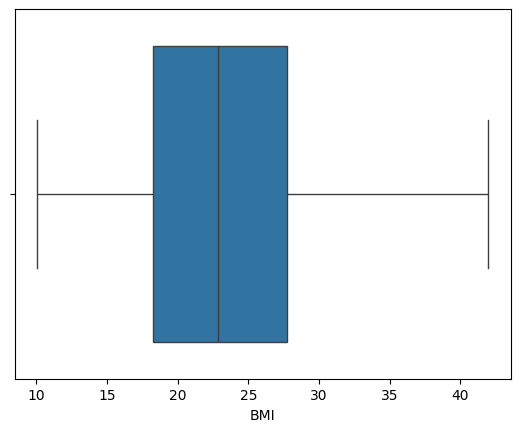

In [10]:
sns.boxplot(x=data['BMI'])

In [11]:
Q1 = data['Temperature'].quantile(0.25)
Q3 = data['Temperature'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data['Temperature']=np.where(data['Temperature']>upper_whisker,upper_whisker,
                       np.where(data['Temperature']<lower_whisker,lower_whisker,
                                data['Temperature']))

<Axes: xlabel='Temperature'>

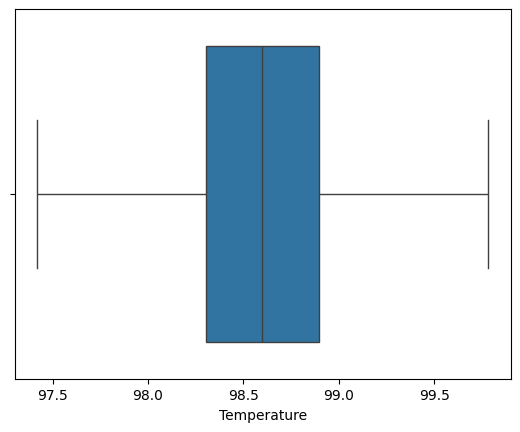

In [12]:
sns.boxplot(x=data['Temperature'])

In [13]:
data_pro=data.copy()


In [14]:
data_pro['Gender']=data_pro['Gender'].map({'Male':1,'Female':0})

In [15]:
data_pro

,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,26.0,1,152.069157,47.630941,B,20.597139,98.714977,93.0,104.0,163.0,No,No
1,32.0,0,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
2,30.0,1,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
3,23.0,0,174.899914,46.234173,O,15.114156,98.480008,95.0,115.0,231.0,No,No
4,21.0,1,172.949704,48.102744,AB,16.081635,97.715469,66.0,134.0,247.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...
145827,28.0,1,183.499177,69.979384,A,20.782695,97.420736,70.0,113.0,140.0,No,No
145828,34.0,1,161.590030,90.877589,B,34.803881,98.728836,70.0,96.0,208.0,No,No
145829,22.0,1,174.899914,46.155224,A,15.088347,98.331019,93.0,100.0,184.0,Yes,No
145830,24.0,1,176.503260,95.756997,B,30.737254,99.170685,65.0,121.0,130.0,No,No


In [16]:
data_pro['Diabetes']=data_pro['Diabetes'].map({'No':1,'Yes':0})
data_pro['Smoking']=data_pro['Smoking'].map({'No':1,'Yes':0})

In [17]:
data_pro

,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,26.0,1,152.069157,47.630941,B,20.597139,98.714977,93.0,104.0,163.0,1,1
1,32.0,0,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,0,1
2,30.0,1,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,1,0
3,23.0,0,174.899914,46.234173,O,15.114156,98.480008,95.0,115.0,231.0,1,1
4,21.0,1,172.949704,48.102744,AB,16.081635,97.715469,66.0,134.0,247.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
145827,28.0,1,183.499177,69.979384,A,20.782695,97.420736,70.0,113.0,140.0,1,1
145828,34.0,1,161.590030,90.877589,B,34.803881,98.728836,70.0,96.0,208.0,1,1
145829,22.0,1,174.899914,46.155224,A,15.088347,98.331019,93.0,100.0,184.0,0,1
145830,24.0,1,176.503260,95.756997,B,30.737254,99.170685,65.0,121.0,130.0,1,1


In [18]:
data_pro['Blood Type']=data_pro['Blood Type'].map({'A':0,'B':1,'O':2,'AB':3})

In [19]:
data_pro

,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,26.0,1,152.069157,47.630941,1,20.597139,98.714977,93.0,104.0,163.0,1,1
1,32.0,0,182.537664,55.741083,0,16.729017,98.260293,76.0,130.0,216.0,0,1
2,30.0,1,182.112867,63.332207,1,19.096042,98.839605,99.0,112.0,141.0,1,0
3,23.0,0,174.899914,46.234173,2,15.114156,98.480008,95.0,115.0,231.0,1,1
4,21.0,1,172.949704,48.102744,3,16.081635,97.715469,66.0,134.0,247.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
145827,28.0,1,183.499177,69.979384,0,20.782695,97.420736,70.0,113.0,140.0,1,1
145828,34.0,1,161.590030,90.877589,1,34.803881,98.728836,70.0,96.0,208.0,1,1
145829,22.0,1,174.899914,46.155224,0,15.088347,98.331019,93.0,100.0,184.0,0,1
145830,24.0,1,176.503260,95.756997,1,30.737254,99.170685,65.0,121.0,130.0,1,1


In [20]:
data_pro.to_csv('data_preprocessing.csv', index=False)